In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, dirname, abspath

from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import hdbscan
import warnings


In [2]:
SPECIES = ['PJ', 'BV', 'AC', 'DP', 'BT', 'DL', 'BH', 'BP',
       'CS', 'EL']
FOLDER = join('Data', 'Species')
def load_growth_data(filename):
    """Load growth data from a CSV file."""
    data = pd.read_csv(join(FOLDER, filename))
    
    data_growth = (data[data['Time'] == 24][SPECIES].values - data[data['Time'] == 0][SPECIES].values )
    
    growth_df = pd.DataFrame(data_growth, columns=SPECIES)
    growth_df['Treatments'] = data[data['Time'] == 24]['Treatments'].values
    growth_df = growth_df.reset_index(drop=True)
    return growth_df

load_growth_data('PJ_growth_profile.csv')

PJ        BV        AC        DP        BT        DL        BH  \
0    0.003724  0.196078  0.183944  0.448211  0.062132  0.696451  0.055866   
1    0.002106  0.065855  0.199391  0.474670  0.045631  0.770538  0.063348   
2    0.001673  0.076443  0.247271  0.398965  0.076639  0.802188  0.012637   
3    0.001256  0.101921  0.208160  0.413006  0.106440  0.640984  0.019463   
4    0.000191  0.492097  0.139730  0.361517  0.026856  0.718147  0.063573   
..        ...       ...       ...       ...       ...       ...       ...   
132  0.018292  0.184676 -0.000843  0.000000  0.151108  0.048938  0.000000   
133  0.019750  0.117305  0.002189  0.321105  0.143482  0.028290  0.011973   
134  0.065944  0.000000 -0.000310  0.477206  0.000000  0.000000  0.015235   
135  0.057380  0.000000  0.000000  0.384680  0.000000  0.082534  0.024513   
136  0.022272  0.391865  0.002252  0.282982  0.122931  0.048299  0.000000   

           BP        CS        EL Treatments  
0    0.046191  0.005828  0.065757     Inulin  
1    0.083587  0.004895  0.109176     Inulin  
2    0.042206  0.004290  0.079048     Inulin  
3    0.038375  0.004913  0.117527     Inulin  
4    0.002107  0.006184  0.115641     Inulin  
..        ...       ...       ...        ...  
132  0.000000  0.013497  0.000000      Xylan  
133  0.004702  0.002045  0.000000      Xylan  
134  0.051420  0.006205  0.105500      Xylan  
135  0.048725  0.004495  0.187006      Xylan  
136  0.000000  0.000000  0.000000      Xylan  

[137 rows x 11 columns]

## PCA

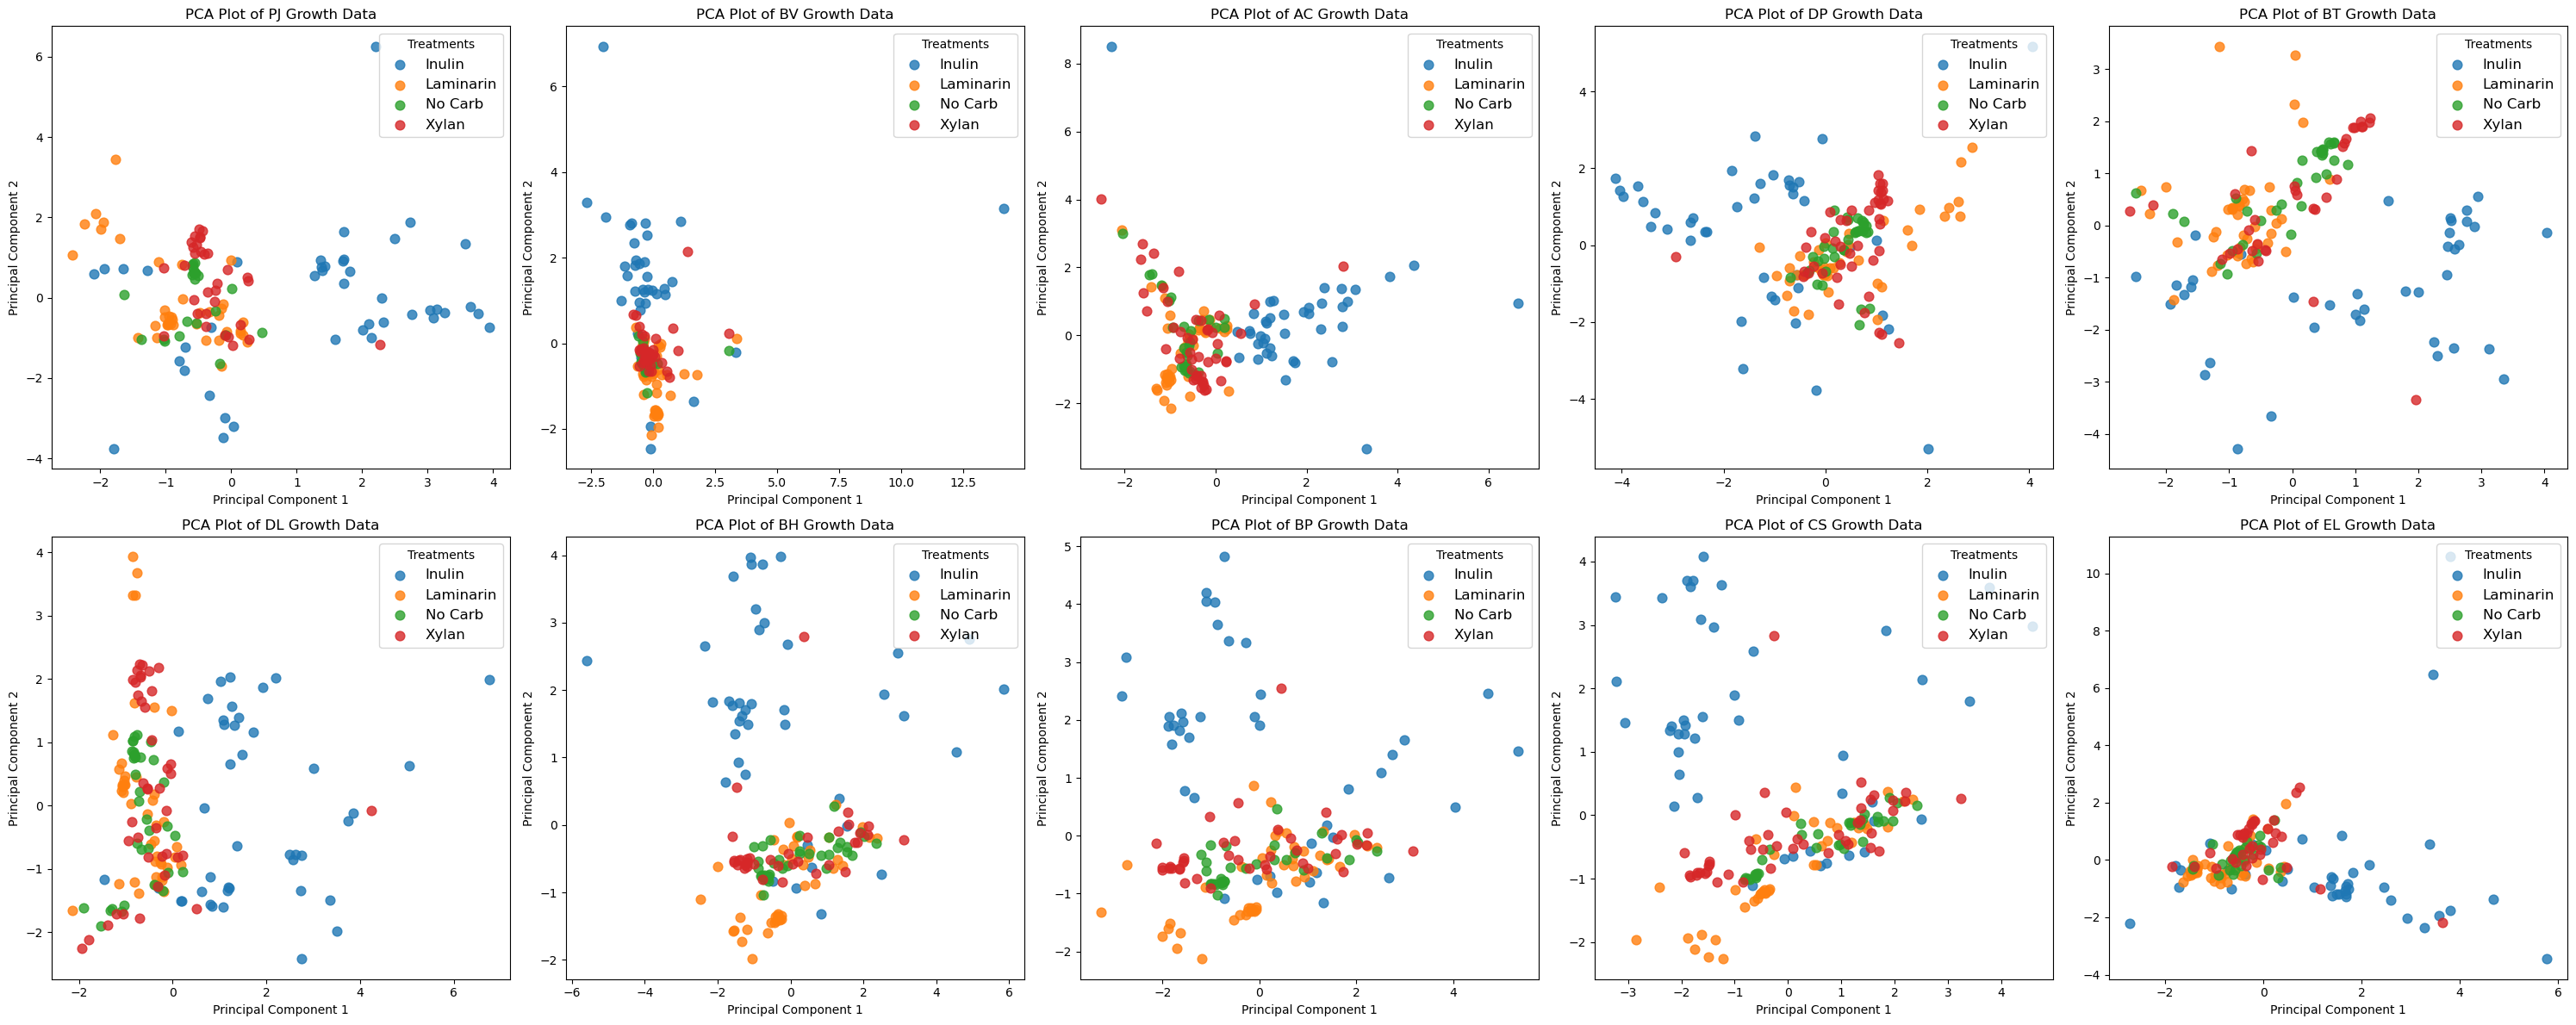

In [ ]:

scaler = StandardScaler()


species = ['PJ', 'BV', 'AC', 'DP', 'BT', 'DL', 'BH', 'BP', 'CS', 'EL']

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))  
axs = axs.flatten()
for i in range(len(species)):
    sp = species[i]
    growth_data = load_growth_data(f'{sp}_growth_profile.csv')
    growth_data_norm = pd.DataFrame(scaler.fit_transform(growth_data.drop(columns=['Treatments'])), columns=growth_data.columns[:-1])
    pca = PCA(n_components=2)
    pca = pca.fit_transform(growth_data_norm)
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]
    pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
    pca_df['Treatments'] = growth_data['Treatments']
    for t in np.unique(pca_df['Treatments']):
        axs[i].scatter(pca_df[pca_df['Treatments'] == t]['PC1'], pca_df[pca_df['Treatments'] == t]['PC2'], label=t, alpha=0.8, s=60)
    axs[i].set_title(f'PCA Plot of {sp} Growth Data')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend(title='Treatments', loc='upper right', fontsize=12)
    
plt.tight_layout()
plt.show()


## K-means

PJ | KMeans with 4 clusters: Silhouette Score = 0.269, Inertia = 918.810
BV | KMeans with 4 clusters: Silhouette Score = 0.258, Inertia = 1088.506
AC | KMeans with 4 clusters: Silhouette Score = 0.201, Inertia = 1103.892
DP | KMeans with 4 clusters: Silhouette Score = 0.209, Inertia = 1080.622
BT | KMeans with 4 clusters: Silhouette Score = 0.218, Inertia = 1015.507
DL | KMeans with 4 clusters: Silhouette Score = 0.229, Inertia = 1049.691
BH | KMeans with 4 clusters: Silhouette Score = 0.270, Inertia = 975.863
BP | KMeans with 4 clusters: Silhouette Score = 0.202, Inertia = 1012.516
CS | KMeans with 4 clusters: Silhouette Score = 0.293, Inertia = 1001.302
EL | KMeans with 4 clusters: Silhouette Score = 0.176, Inertia = 1078.908


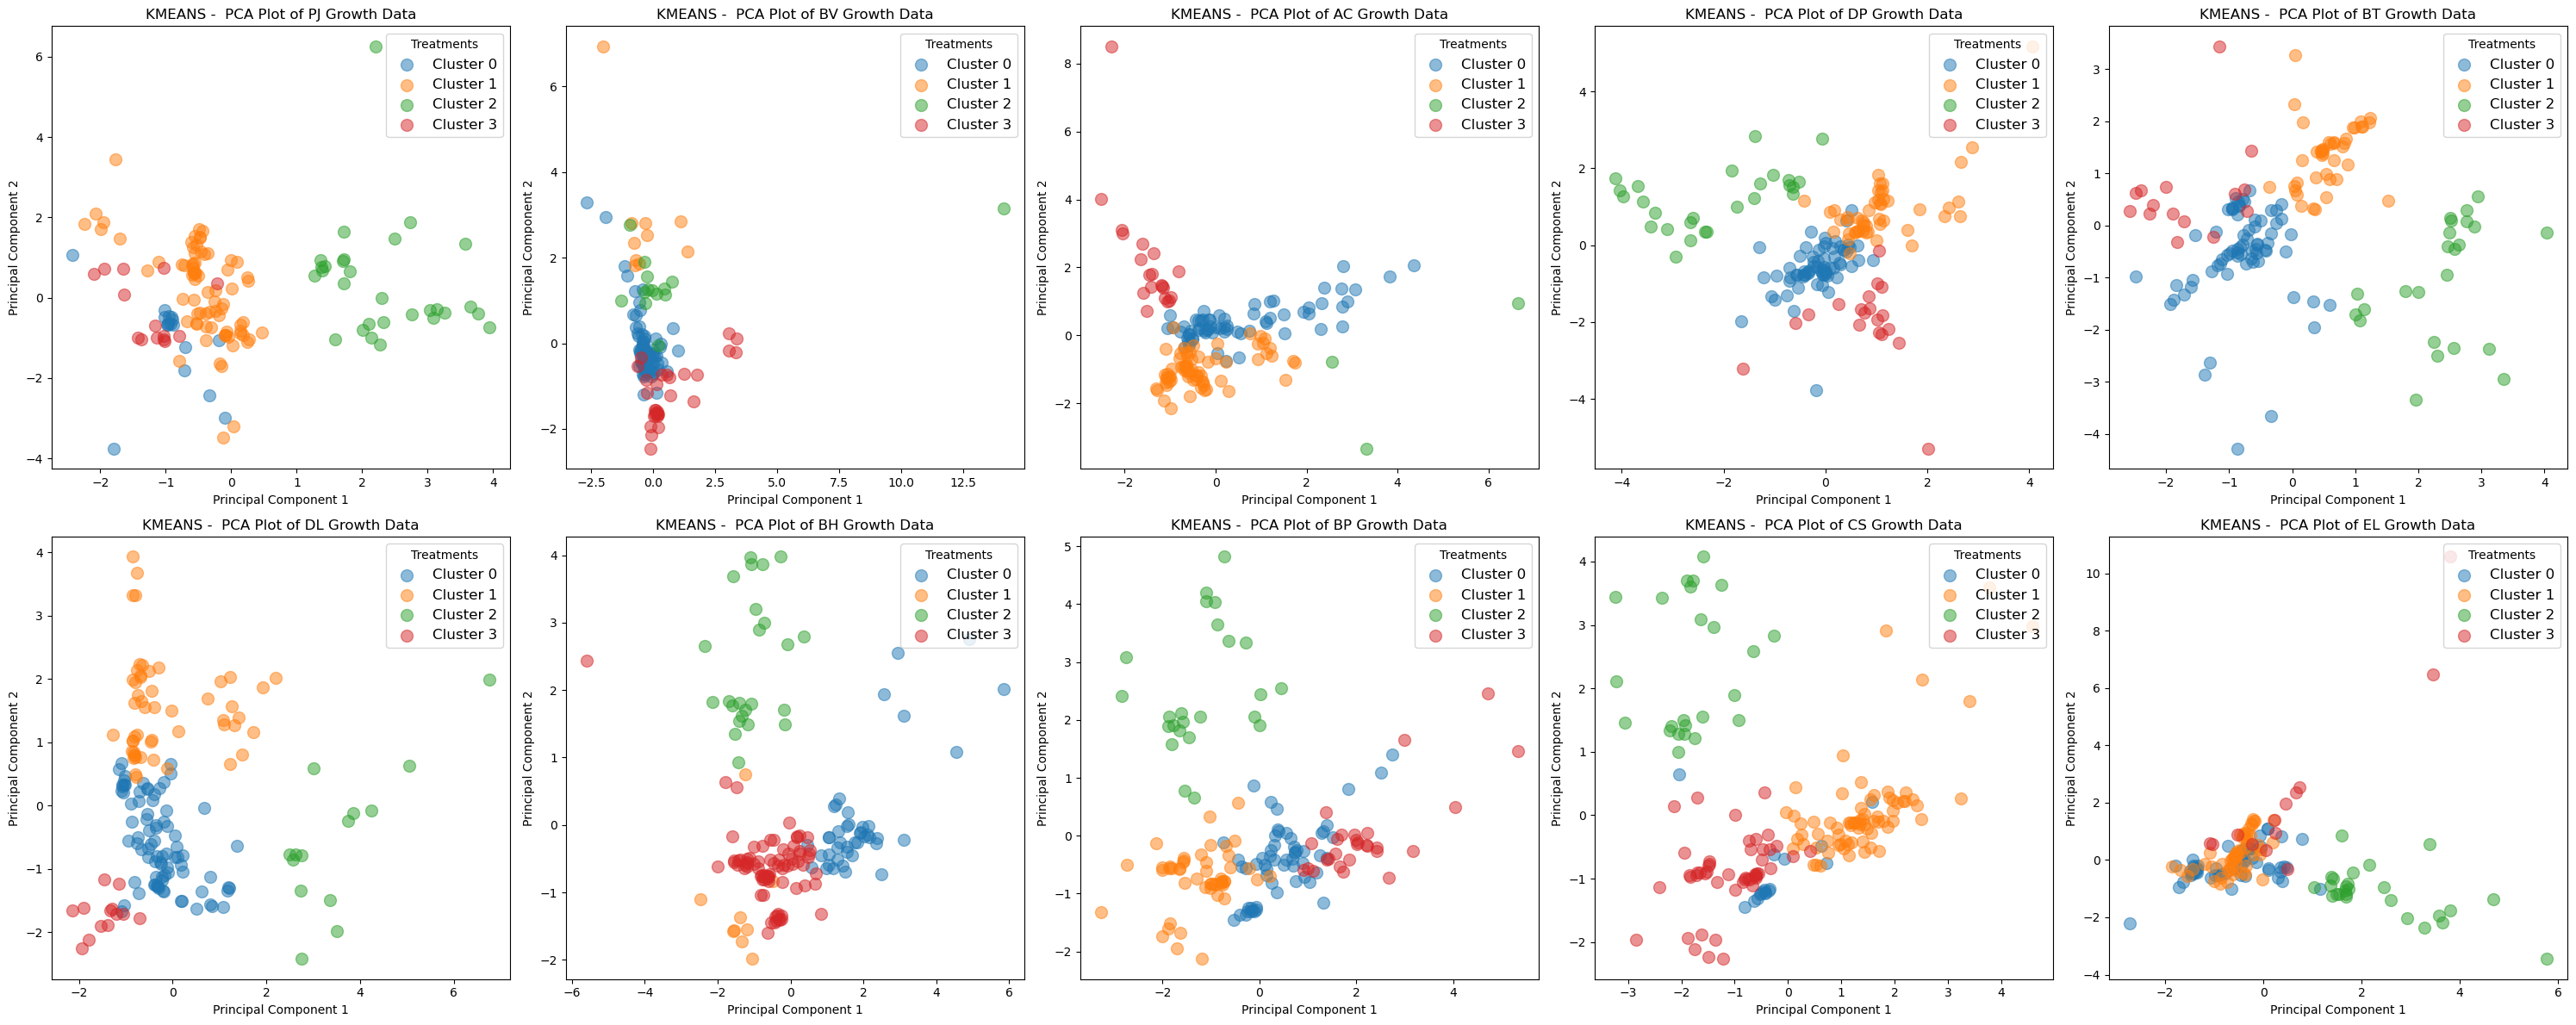

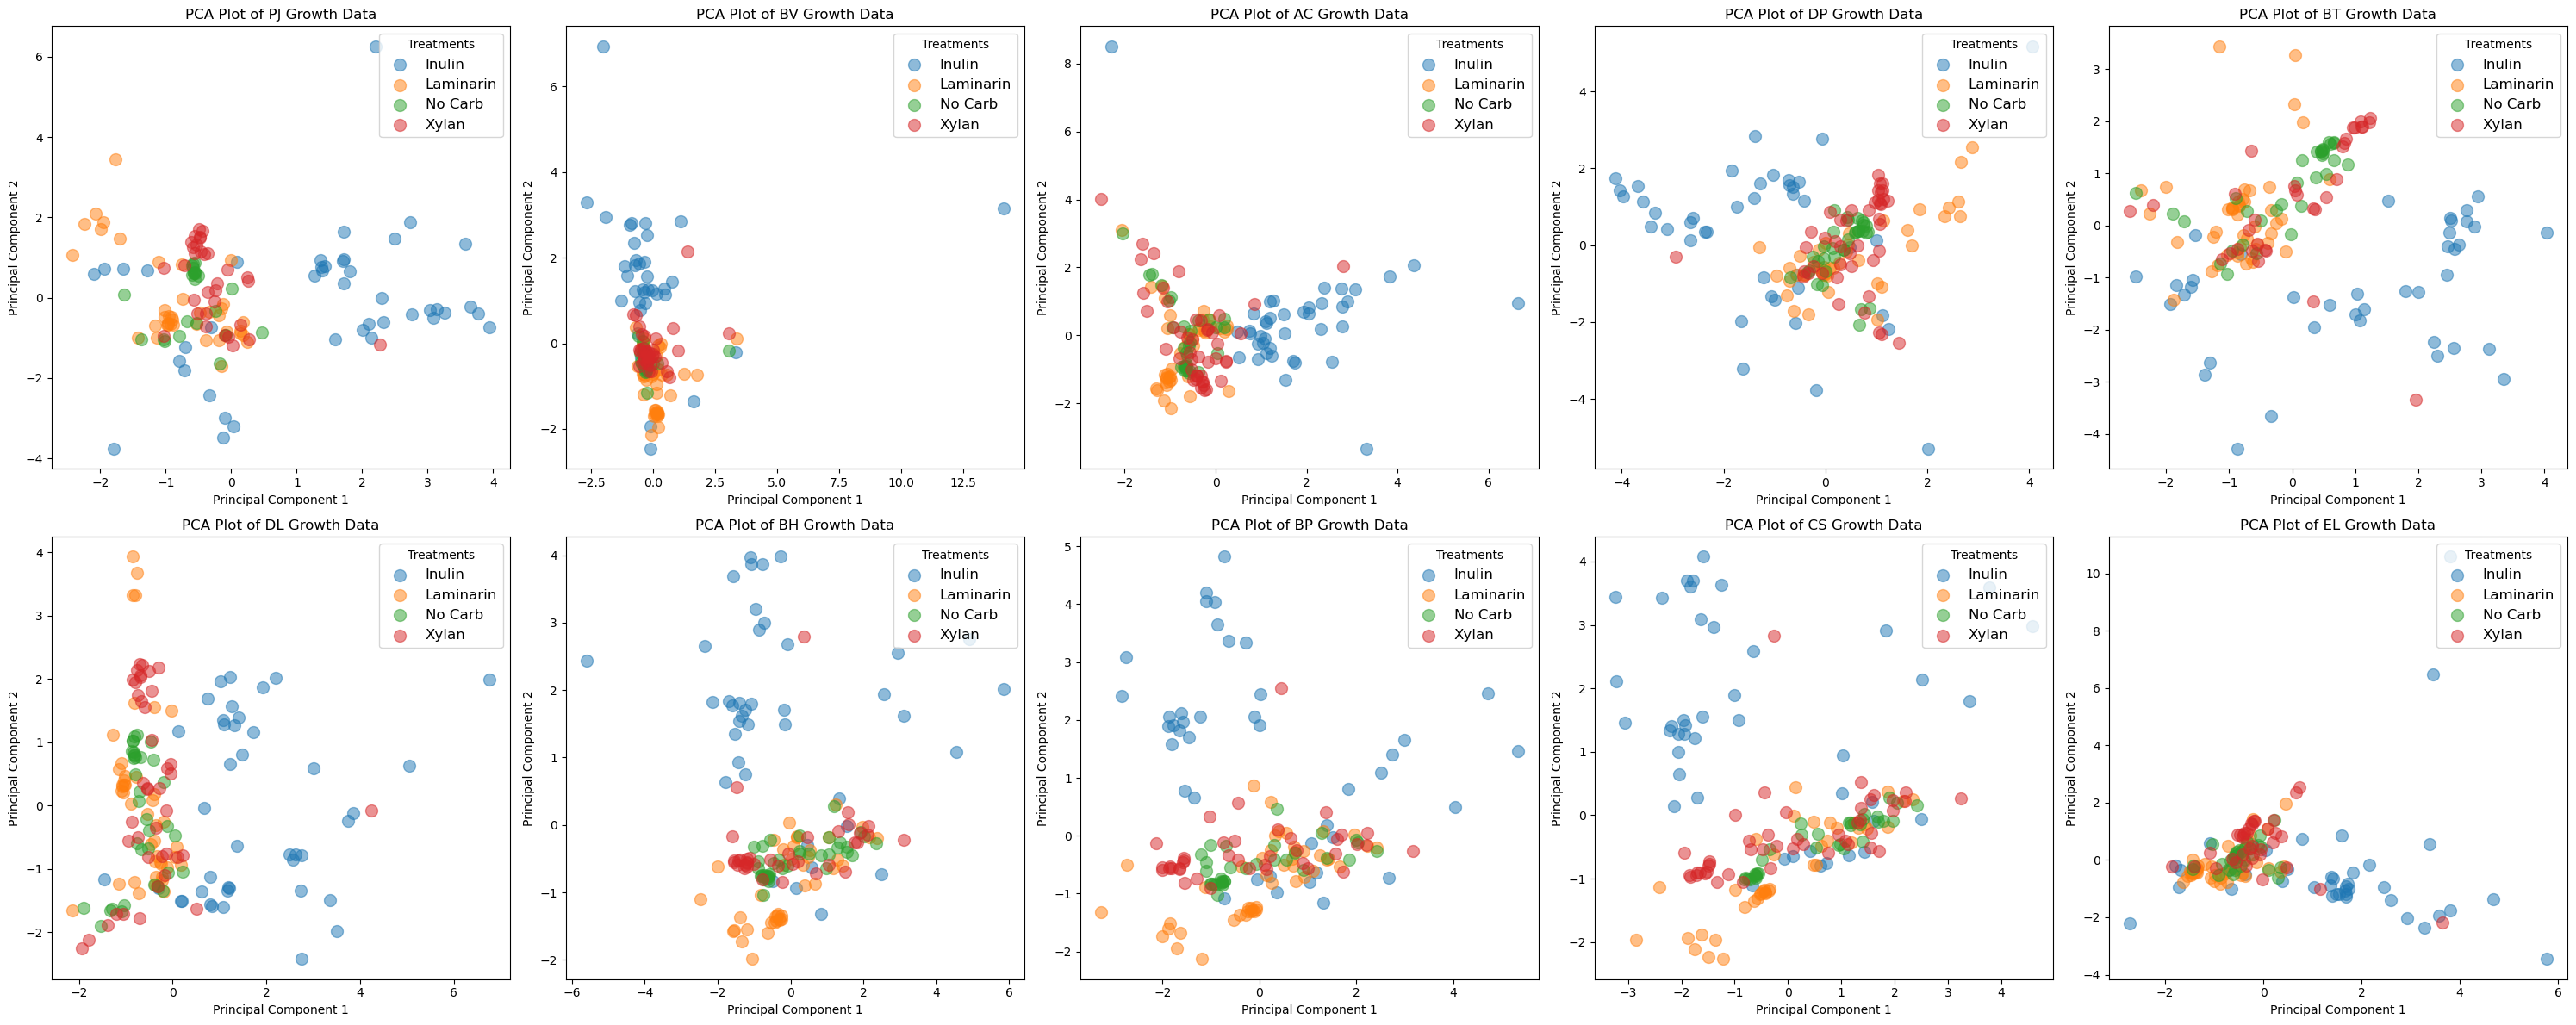

In [50]:
warnings.filterwarnings('ignore')
n = 4

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))  
axs = axs.flatten()


for i in range(len(species)):
    sp = species[i]
    growth_data = load_growth_data(f'{sp}_growth_profile.csv')
    growth_data_norm = pd.DataFrame(scaler.fit_transform(growth_data.drop(columns=['Treatments'])), columns=growth_data.columns[:-1])
    pca = PCA(n_components=2)
    pca = pca.fit_transform(growth_data_norm)
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]
    pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
    pca_df['Treatments'] = growth_data['Treatments']
    clusters_kmeans = pd.DataFrame()
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(growth_data_norm)
    clusters_kmeans['clusters'] = kmeans.fit_predict(growth_data_norm)
    cluster = kmeans.labels_
    score_kmeans = silhouette_score(growth_data_norm, cluster)
    in_score = kmeans.inertia_
    print(f'{sp} | KMeans with {n} clusters: Silhouette Score = {score_kmeans:.3f}, Inertia = {in_score:.3f}')
    
    
    for j in np.unique(cluster):
        axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Cluster {j}', alpha=0.5, s=100)
    axs[i].set_title(f'KMEANS -  PCA Plot of {sp} Growth Data')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend(title='Treatments', loc='upper right', fontsize=12)
    
plt.tight_layout()
plt.show()


fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))  
axs = axs.flatten()
for i in range(len(species)):
    sp = species[i]
    growth_data = load_growth_data(f'{sp}_growth_profile.csv')
    growth_data_norm = pd.DataFrame(scaler.fit_transform(growth_data.drop(columns=['Treatments'])), columns=growth_data.columns[:-1])
    pca = PCA(n_components=2)
    pca = pca.fit_transform(growth_data_norm)
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]
    pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
    pca_df['Treatments'] = growth_data['Treatments']
    for t in np.unique(pca_df['Treatments']):
        axs[i].scatter(pca_df[pca_df['Treatments'] == t]['PC1'], pca_df[pca_df['Treatments'] == t]['PC2'], label=t, alpha=0.5, s=100)
    axs[i].set_title(f'PCA Plot of {sp} Growth Data')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend(title='Treatments', loc='upper right', fontsize=12)
    
plt.tight_layout()
plt.show()

## HDBSCAN

HDBSCAN with 6 clusters: Silhouette Score = 0.176
HDBSCAN with 6 clusters: Silhouette Score = 0.176
HDBSCAN with 6 clusters: Silhouette Score = 0.176
HDBSCAN with 6 clusters: Silhouette Score = 0.176
HDBSCAN with 6 clusters: Silhouette Score = 0.176
HDBSCAN with 6 clusters: Silhouette Score = 0.176
HDBSCAN with 6 clusters: Silhouette Score = 0.176
HDBSCAN with 6 clusters: Silhouette Score = 0.176
HDBSCAN with 6 clusters: Silhouette Score = 0.176
HDBSCAN with 6 clusters: Silhouette Score = 0.176


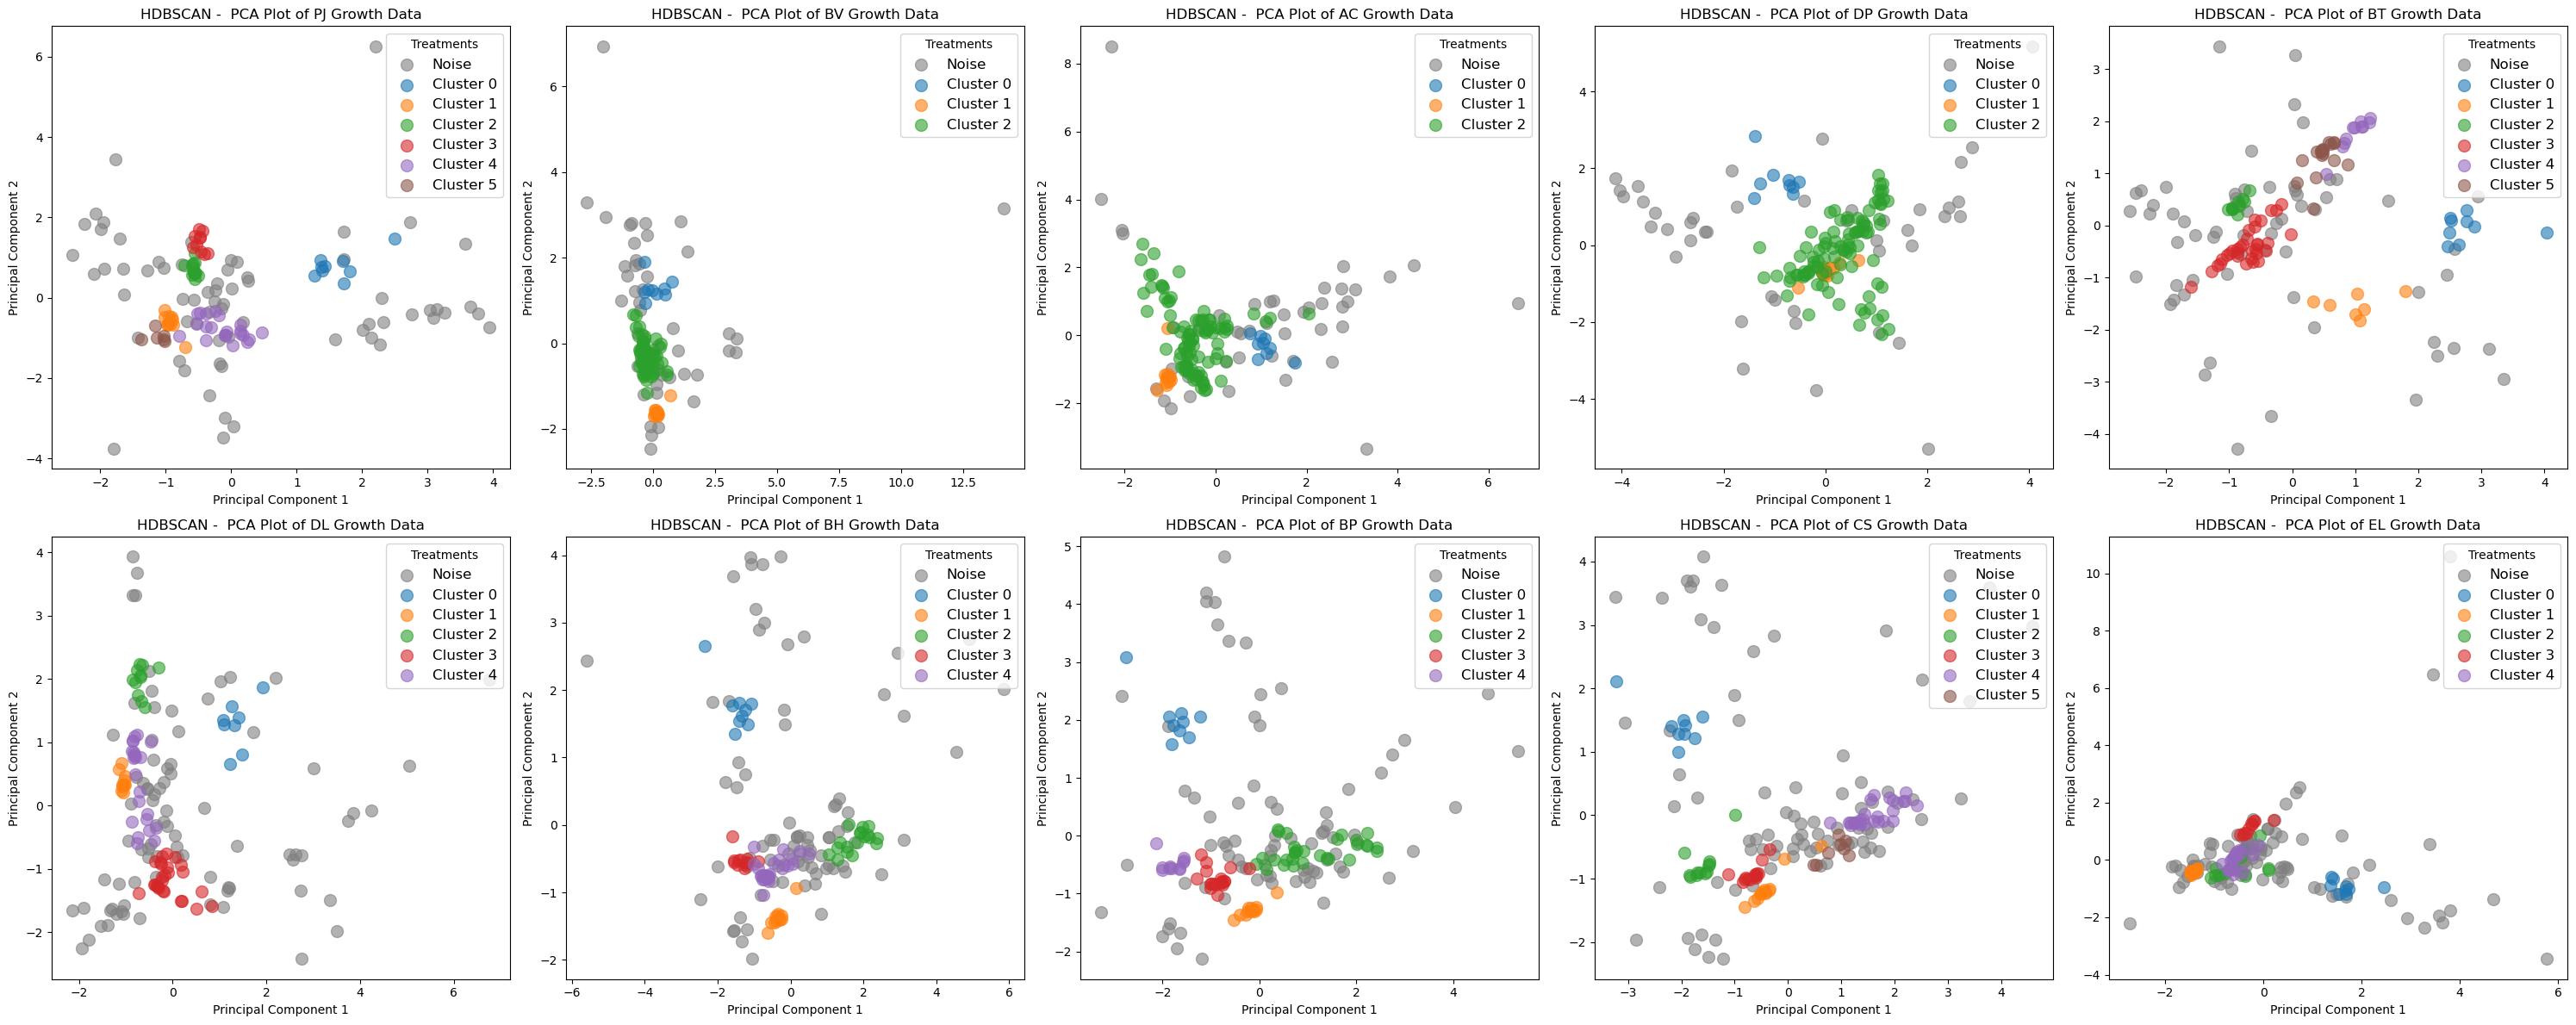

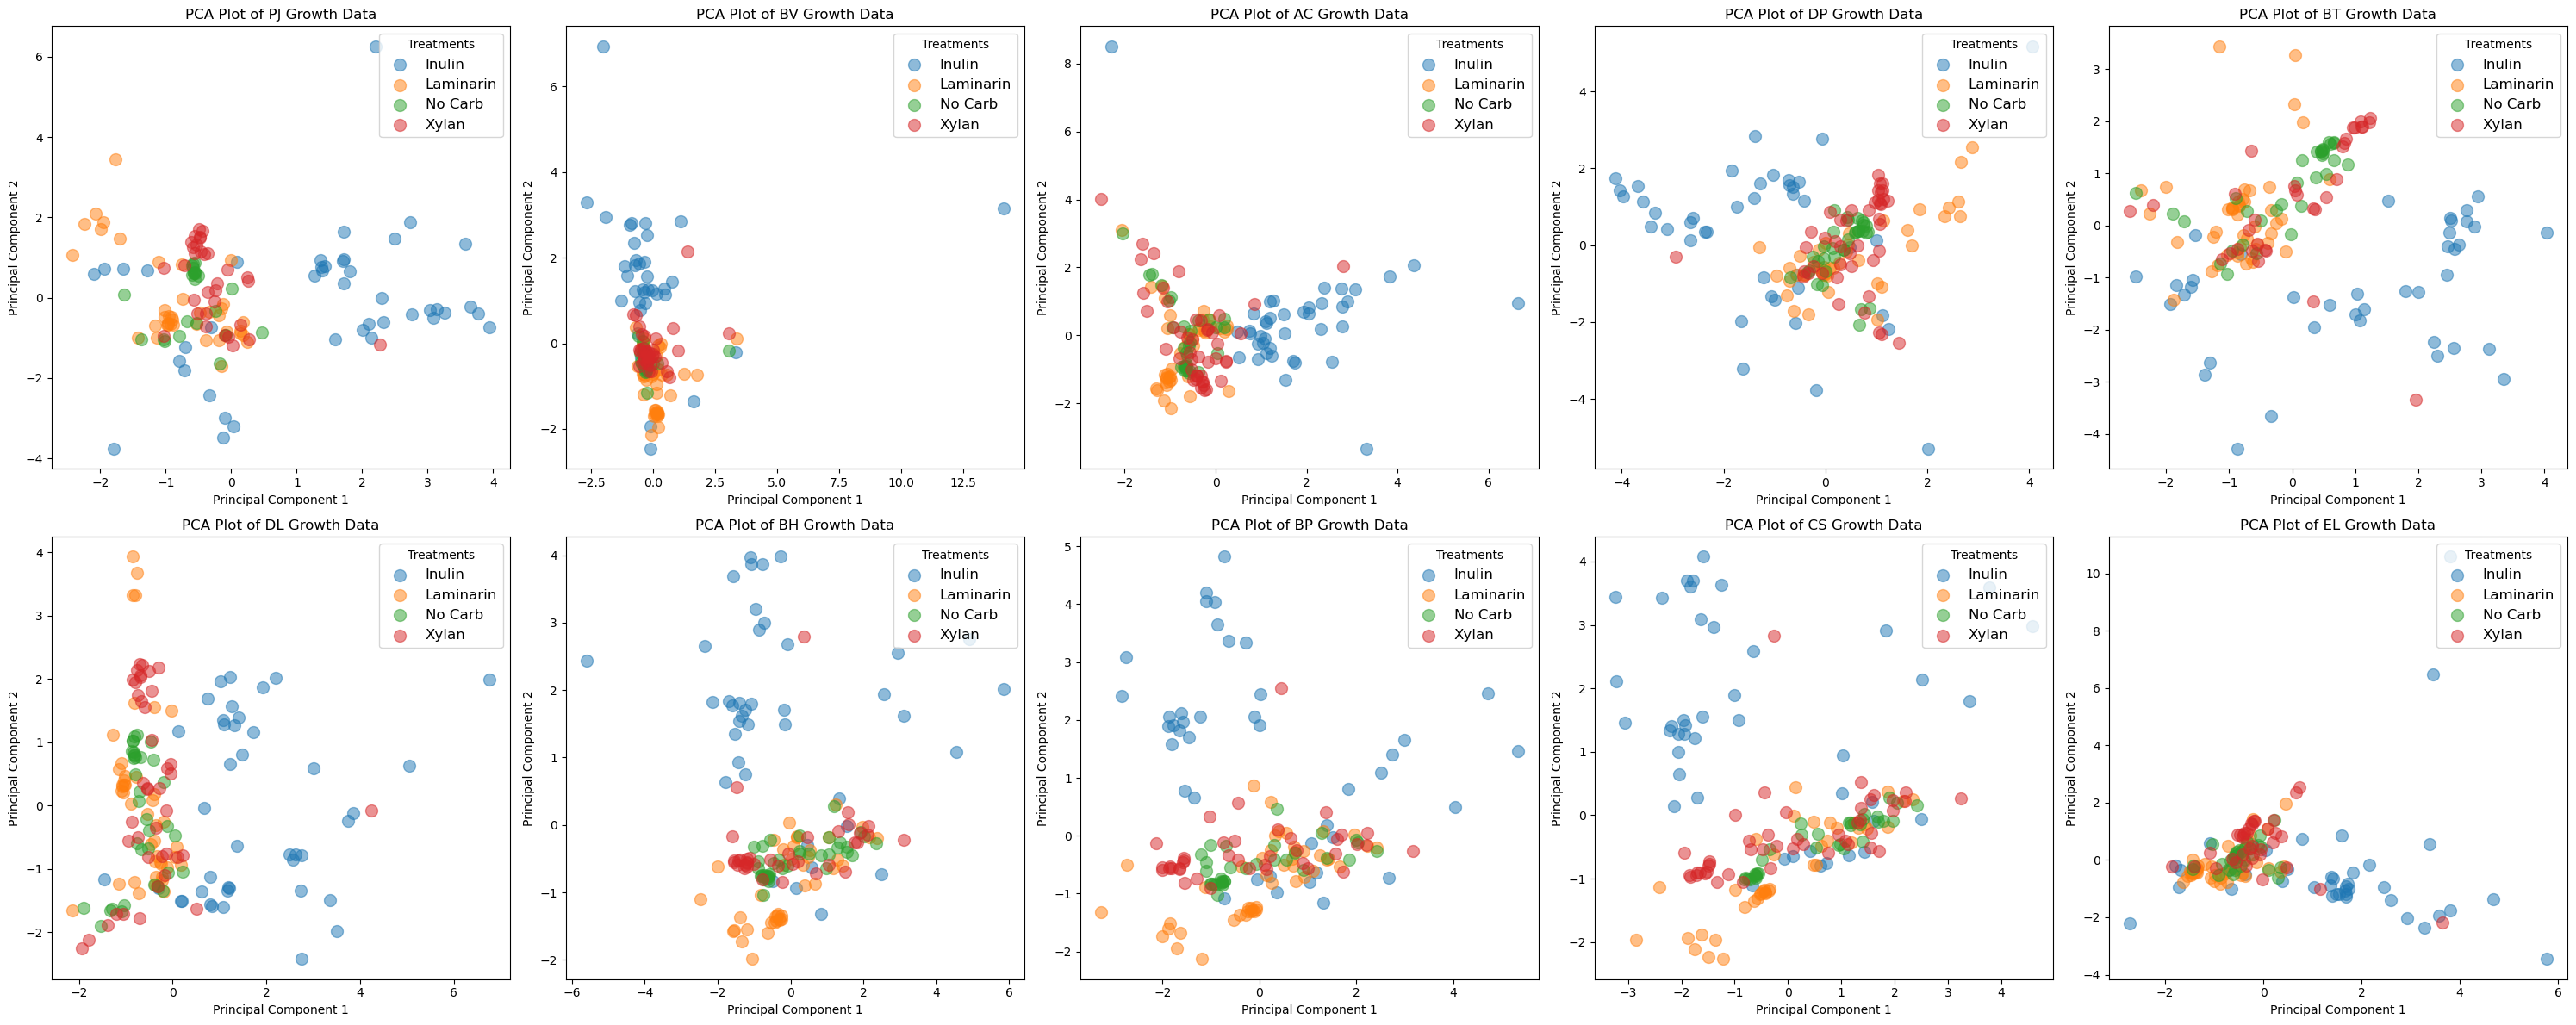

In [45]:
n = 6

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))  
axs = axs.flatten()


for i in range(len(species)):
    sp = species[i]
    growth_data = load_growth_data(f'{sp}_growth_profile.csv')
    growth_data_norm = pd.DataFrame(scaler.fit_transform(growth_data.drop(columns=['Treatments'])), columns=growth_data.columns[:-1])
    pca = PCA(n_components=2)
    pca = pca.fit_transform(growth_data_norm)
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]
    pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
    pca_df['Treatments'] = growth_data['Treatments']
    
    clusters_hdbscan = pd.DataFrame()
    cluster = clusterer.fit_predict(growth_data_norm)
    clusterer = hdbscan.HDBSCAN(min_cluster_size=n, gen_min_span_tree=True)
    clusterer.fit(growth_data_norm)
    clusters_hdbscan['clusters'] = clusterer.fit_predict(growth_data_norm)
    score_hdbscaan = silhouette_score(growth_data_norm, cluster)
    print(f'HDBSCAN with {n} clusters: Silhouette Score = {score_kmeans:.3f}')

        
    for j in np.unique(cluster):
        if j != -1: 
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Cluster {j}', alpha=0.6, s=100)
        else:
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label='Noise', alpha=0.6, s=100, color='gray')

    axs[i].set_title(f'HDBSCAN -  PCA Plot of {sp} Growth Data')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend(title='Treatments', loc='upper right', fontsize=12)
    
plt.tight_layout()
plt.show()


fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))  
axs = axs.flatten()
for i in range(len(species)):
    sp = species[i]
    growth_data = load_growth_data(f'{sp}_growth_profile.csv')
    growth_data_norm = pd.DataFrame(scaler.fit_transform(growth_data.drop(columns=['Treatments'])), columns=growth_data.columns[:-1])
    pca = PCA(n_components=2)
    pca = pca.fit_transform(growth_data_norm)
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]
    pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
    pca_df['Treatments'] = growth_data['Treatments']
    for t in np.unique(pca_df['Treatments']):
        axs[i].scatter(pca_df[pca_df['Treatments'] == t]['PC1'], pca_df[pca_df['Treatments'] == t]['PC2'], label=t, alpha=0.5, s=100)
    axs[i].set_title(f'PCA Plot of {sp} Growth Data')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend(title='Treatments', loc='upper right', fontsize=12)
    
plt.tight_layout()
plt.show()

## DBSCAN

DBSCAN with 3: Silhouette Score = 0.516
DBSCAN with 5: Silhouette Score = 0.706
DBSCAN with 3: Silhouette Score = 0.507
DBSCAN with 7: Silhouette Score = 0.640
DBSCAN with 2.5: Silhouette Score = 0.251
DBSCAN with 3.8: Silhouette Score = 0.536
DBSCAN with 3.3: Silhouette Score = 0.507
DBSCAN with 3.7: Silhouette Score = 0.460
DBSCAN with 3: Silhouette Score = 0.439
DBSCAN with 4.6: Silhouette Score = 0.648


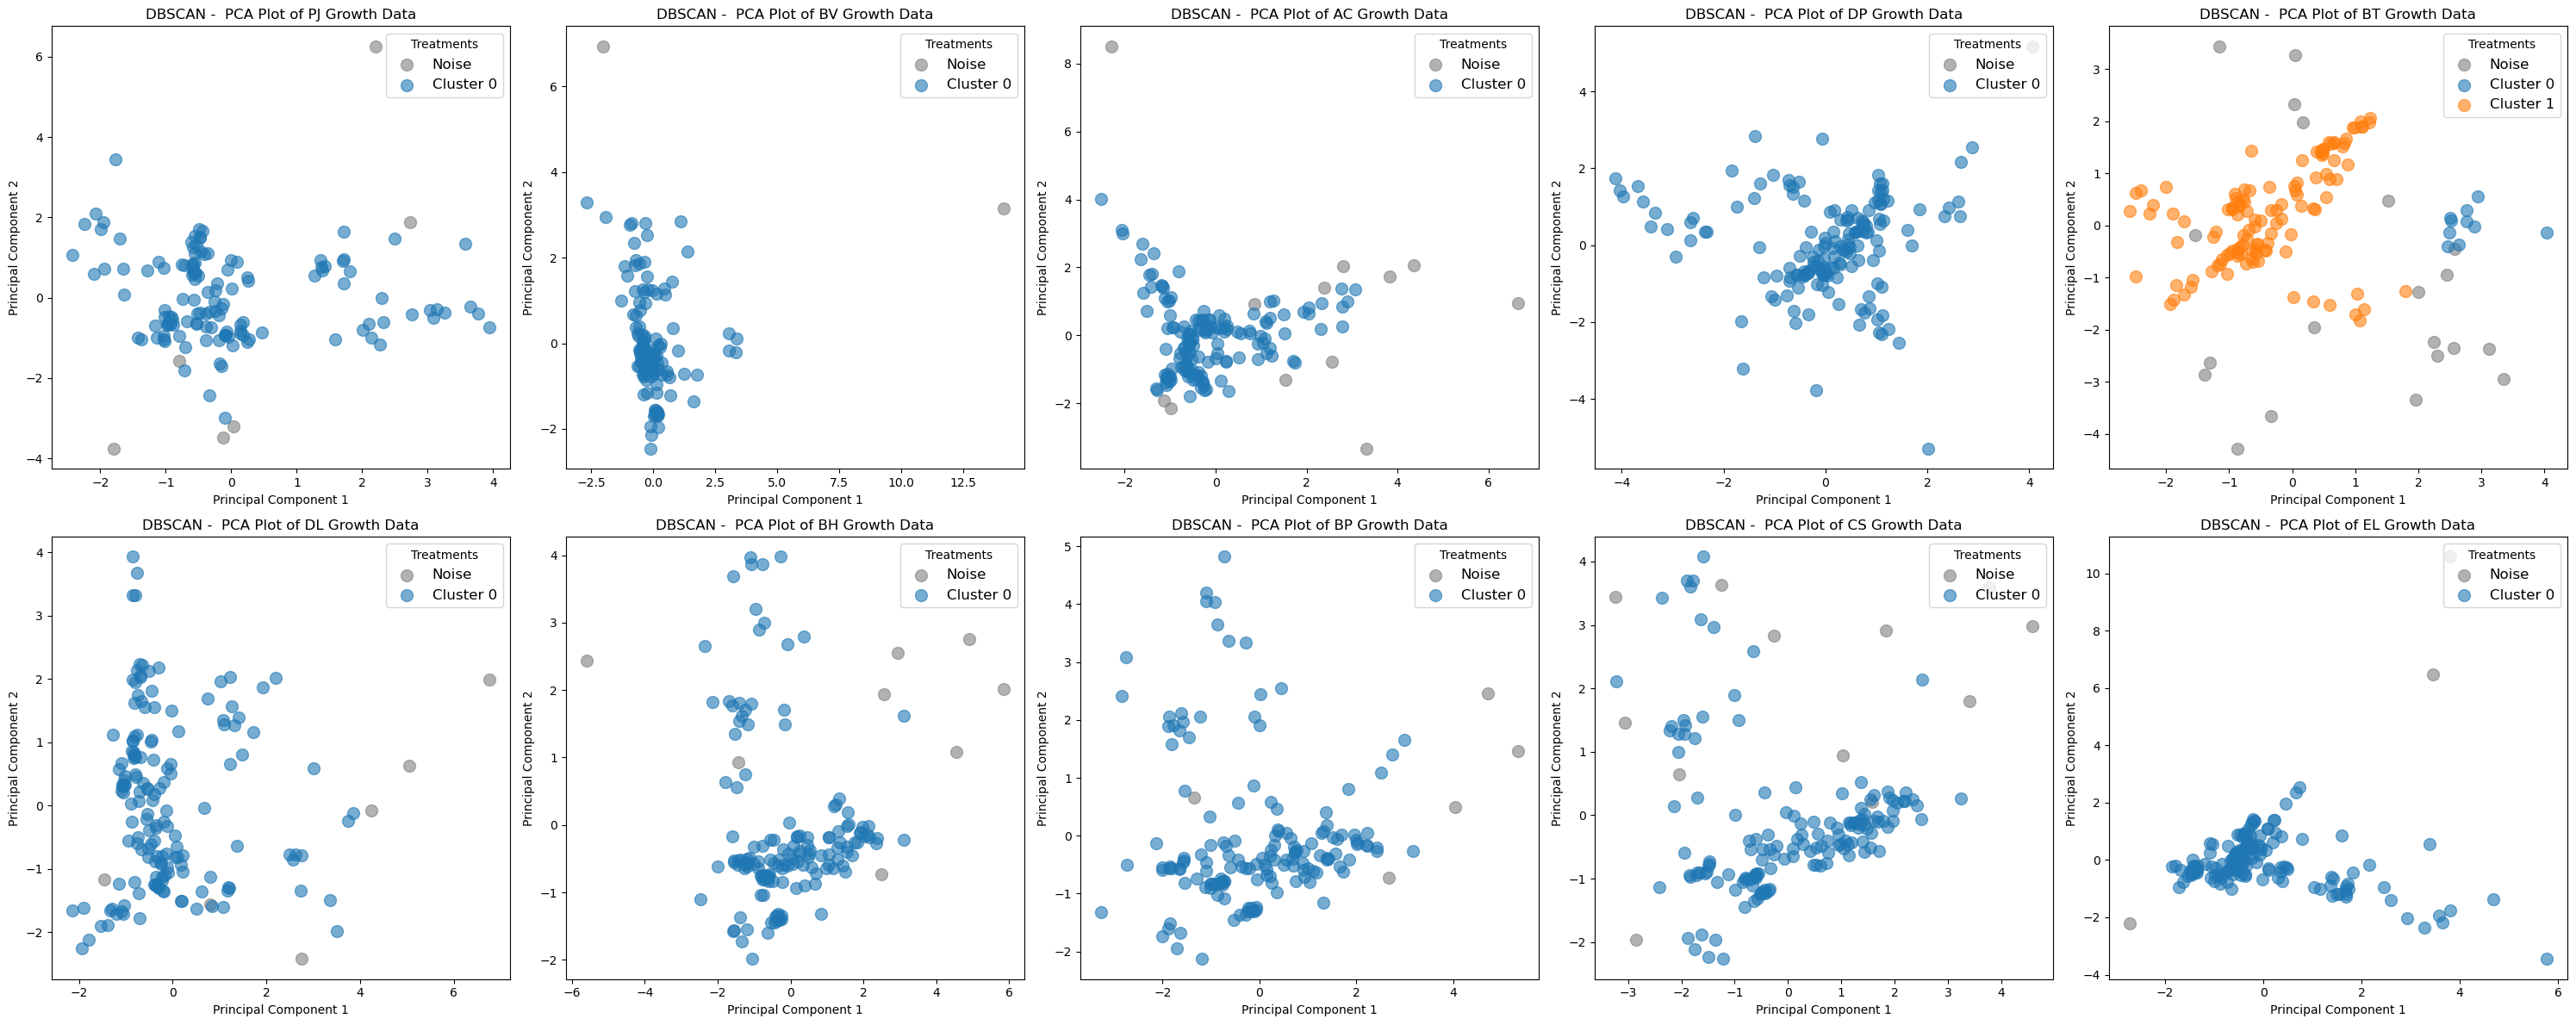

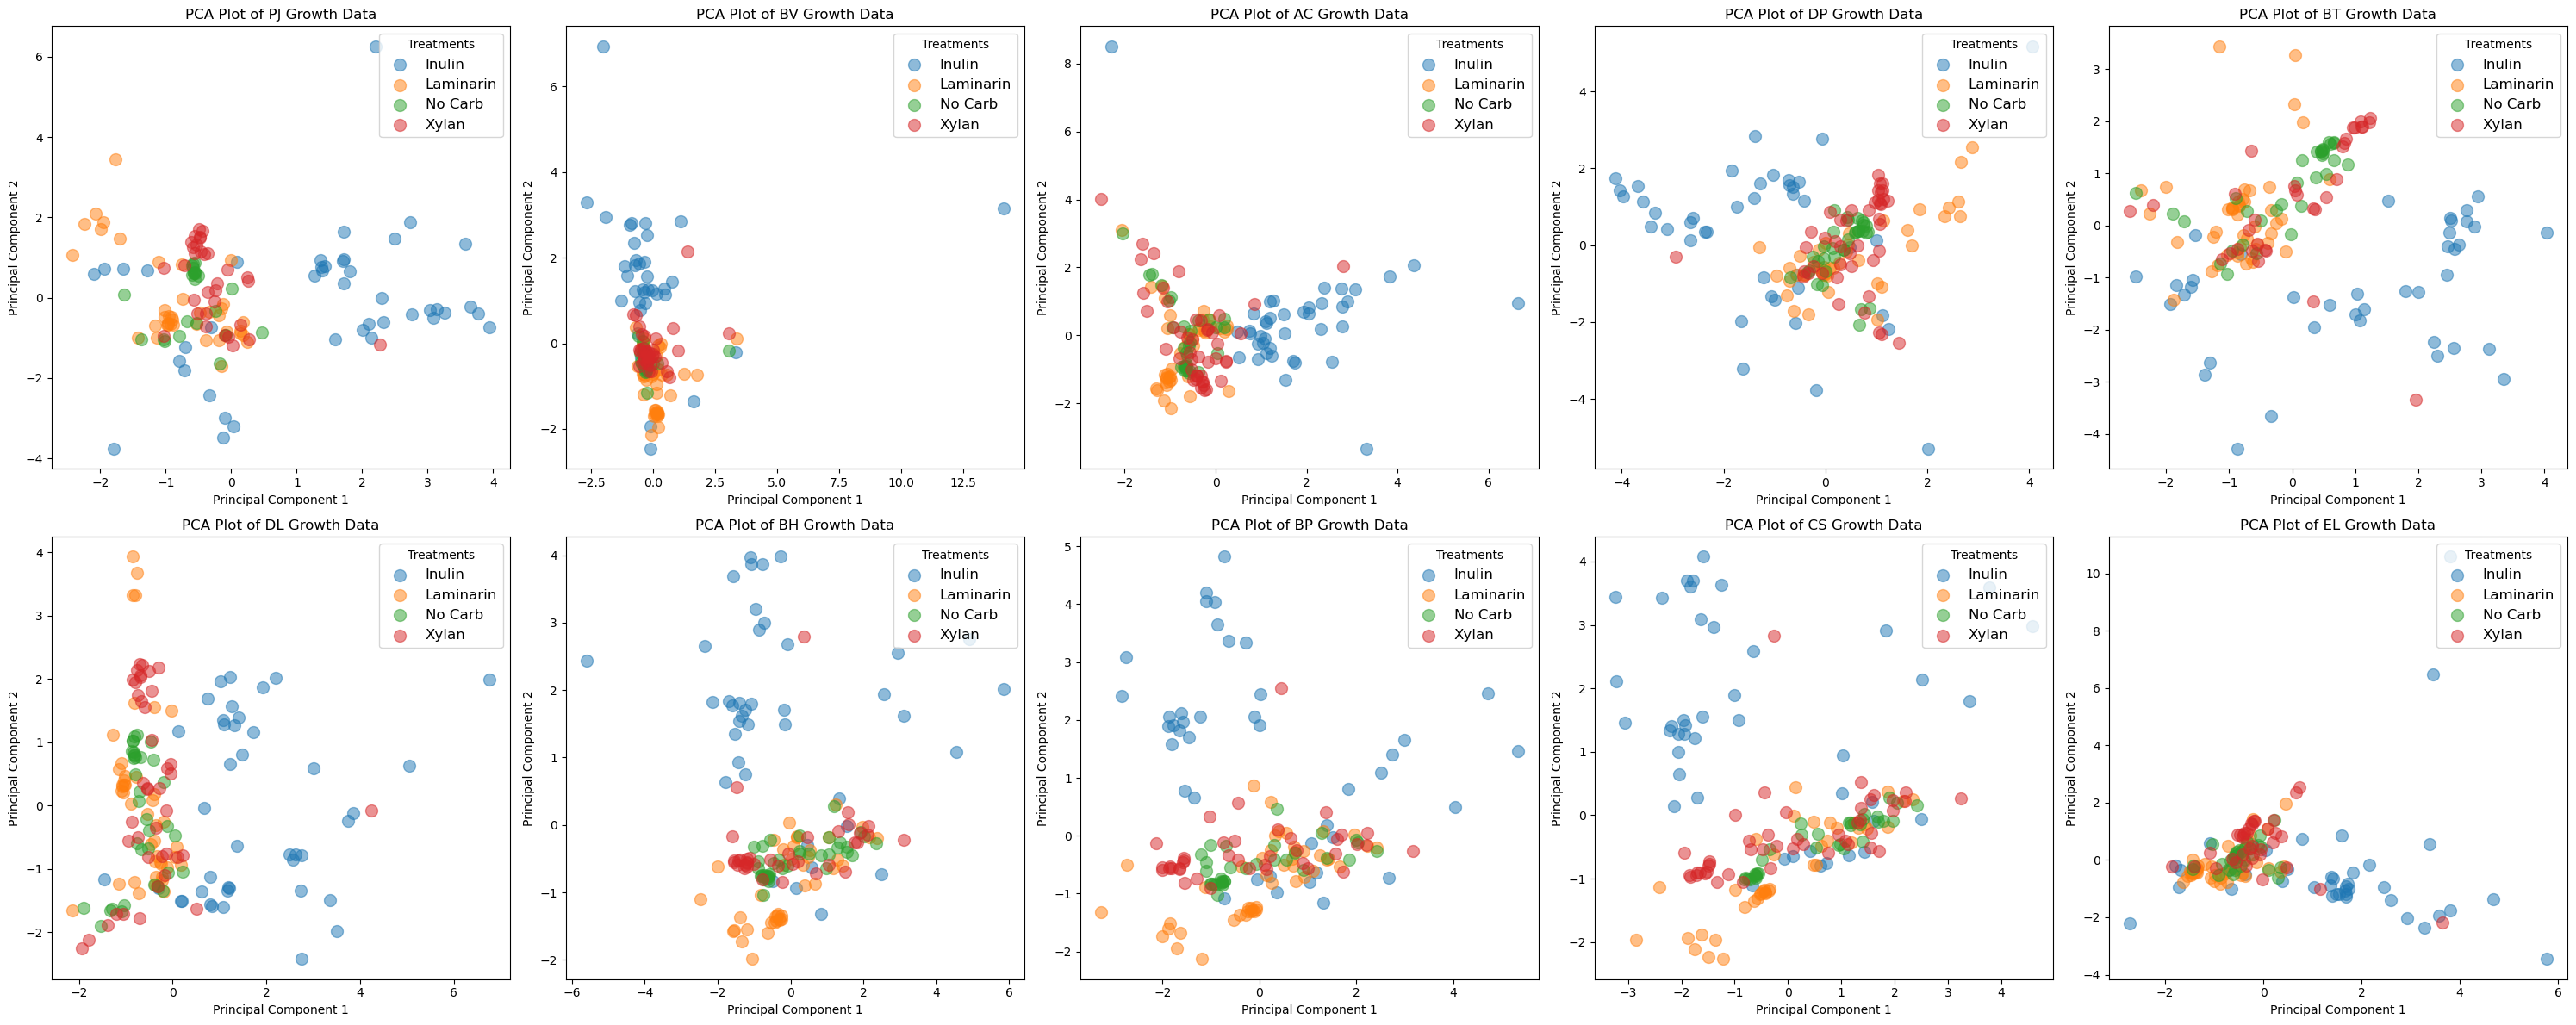

In [47]:
# for i in range(len(species)):
#     sp = species[i]
#     growth_data = load_growth_data(f'{sp}_growth_profile.csv')
#     growth_data_norm = pd.DataFrame(scaler.fit_transform(growth_data.drop(columns=['Treatments'])), columns=growth_data.columns[:-1])

    
#     neighbors = NearestNeighbors(n_neighbors=2)
#     neighbors_fit = neighbors.fit(growth_data_norm)
#     distances, indices = neighbors_fit.kneighbors(growth_data_norm)
#     distances = np.sort(distances, axis=0)
#     distances = distances[:,1]

#     plt.figure(figsize=(10, 4))
#     plt.xlabel("Points sorted according to distance of 2nd NN")
#     plt.ylabel("2nd nearest neighbor distance")
#     plt.title("k-dist plot | " + sp)
#     plt.plot(distances)
#     plt.grid(True)
#     plt.show()


eps_n = [3, 5, 3, 7, 2.5, 3.8, 3.3, 3.7, 3, 4.6]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))  
axs = axs.flatten()


for i in range(len(species)):
    sp = species[i]
    n = eps_n[i]
    growth_data = load_growth_data(f'{sp}_growth_profile.csv')
    growth_data_norm = pd.DataFrame(scaler.fit_transform(growth_data.drop(columns=['Treatments'])), columns=growth_data.columns[:-1])
    pca = PCA(n_components=2)
    pca = pca.fit_transform(growth_data_norm)
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]
    pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
    pca_df['Treatments'] = growth_data['Treatments']

    clusters_dbscan = pd.DataFrame()

    dbscan = DBSCAN(eps=n)
    model = dbscan.fit(growth_data_norm)
    cluster = model.labels_
    score_dbscan = silhouette_score(growth_data_norm, cluster)
    print(f'DBSCAN with {n}: Silhouette Score = {score_dbscan:.3f}')
        
    for j in np.unique(cluster):
        if j != -1: 
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Cluster {j}', alpha=0.6, s=100)
        else:
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label='Noise', alpha=0.6, s=100, color='gray')

    axs[i].set_title(f'DBSCAN -  PCA Plot of {sp} Growth Data')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend(title='Treatments', loc='upper right', fontsize=12)
    
plt.tight_layout()
plt.show()


fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))  
axs = axs.flatten()
for i in range(len(species)):
    sp = species[i]
    growth_data = load_growth_data(f'{sp}_growth_profile.csv')
    growth_data_norm = pd.DataFrame(scaler.fit_transform(growth_data.drop(columns=['Treatments'])), columns=growth_data.columns[:-1])
    pca = PCA(n_components=2)
    pca = pca.fit_transform(growth_data_norm)
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]
    pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
    pca_df['Treatments'] = growth_data['Treatments']
    for t in np.unique(pca_df['Treatments']):
        axs[i].scatter(pca_df[pca_df['Treatments'] == t]['PC1'], pca_df[pca_df['Treatments'] == t]['PC2'], label=t, alpha=0.5, s=100)
    axs[i].set_title(f'PCA Plot of {sp} Growth Data')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend(title='Treatments', loc='upper right', fontsize=12)
    
plt.tight_layout()
plt.show()

## GMM

GMM with 43: Silhouette Score = 0.321
GMM with 39: Silhouette Score = 0.327
GMM with 48: Silhouette Score = 0.328
GMM with 40: Silhouette Score = 0.221
GMM with 56: Silhouette Score = 0.294
GMM with 55: Silhouette Score = 0.303
GMM with 55: Silhouette Score = 0.327
GMM with 56: Silhouette Score = 0.292
GMM with 55: Silhouette Score = 0.297
GMM with 55: Silhouette Score = 0.313


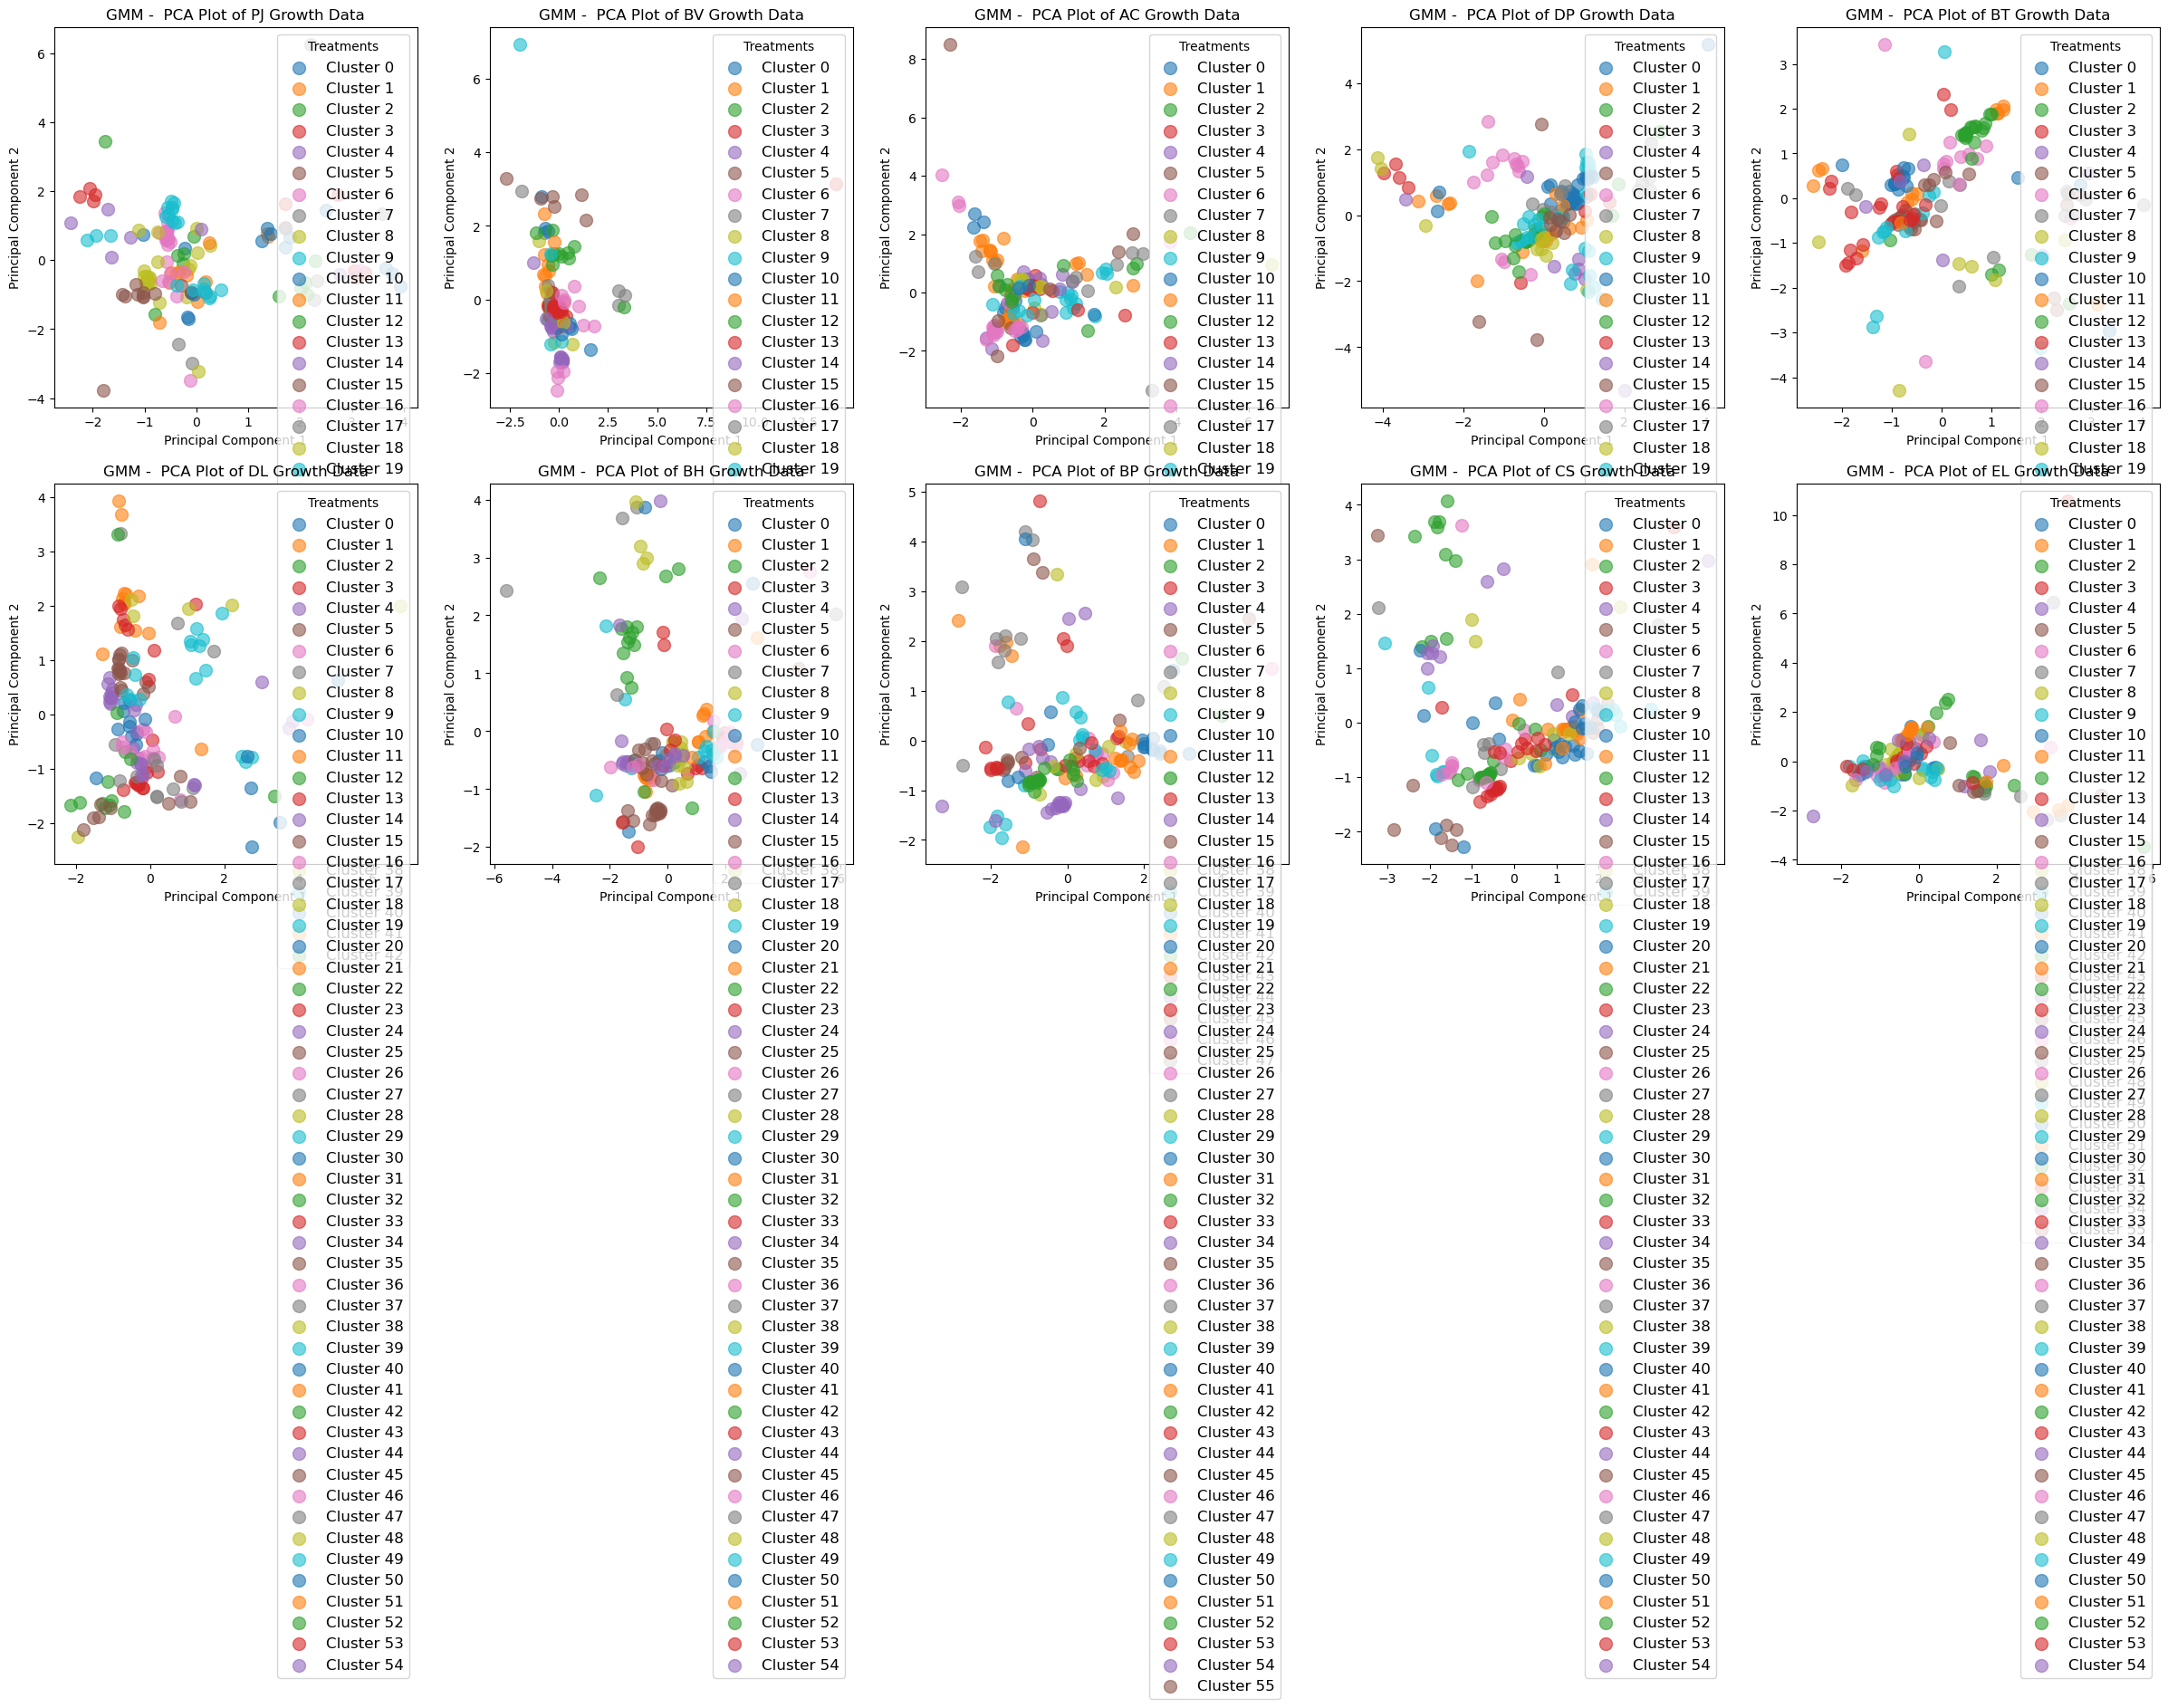

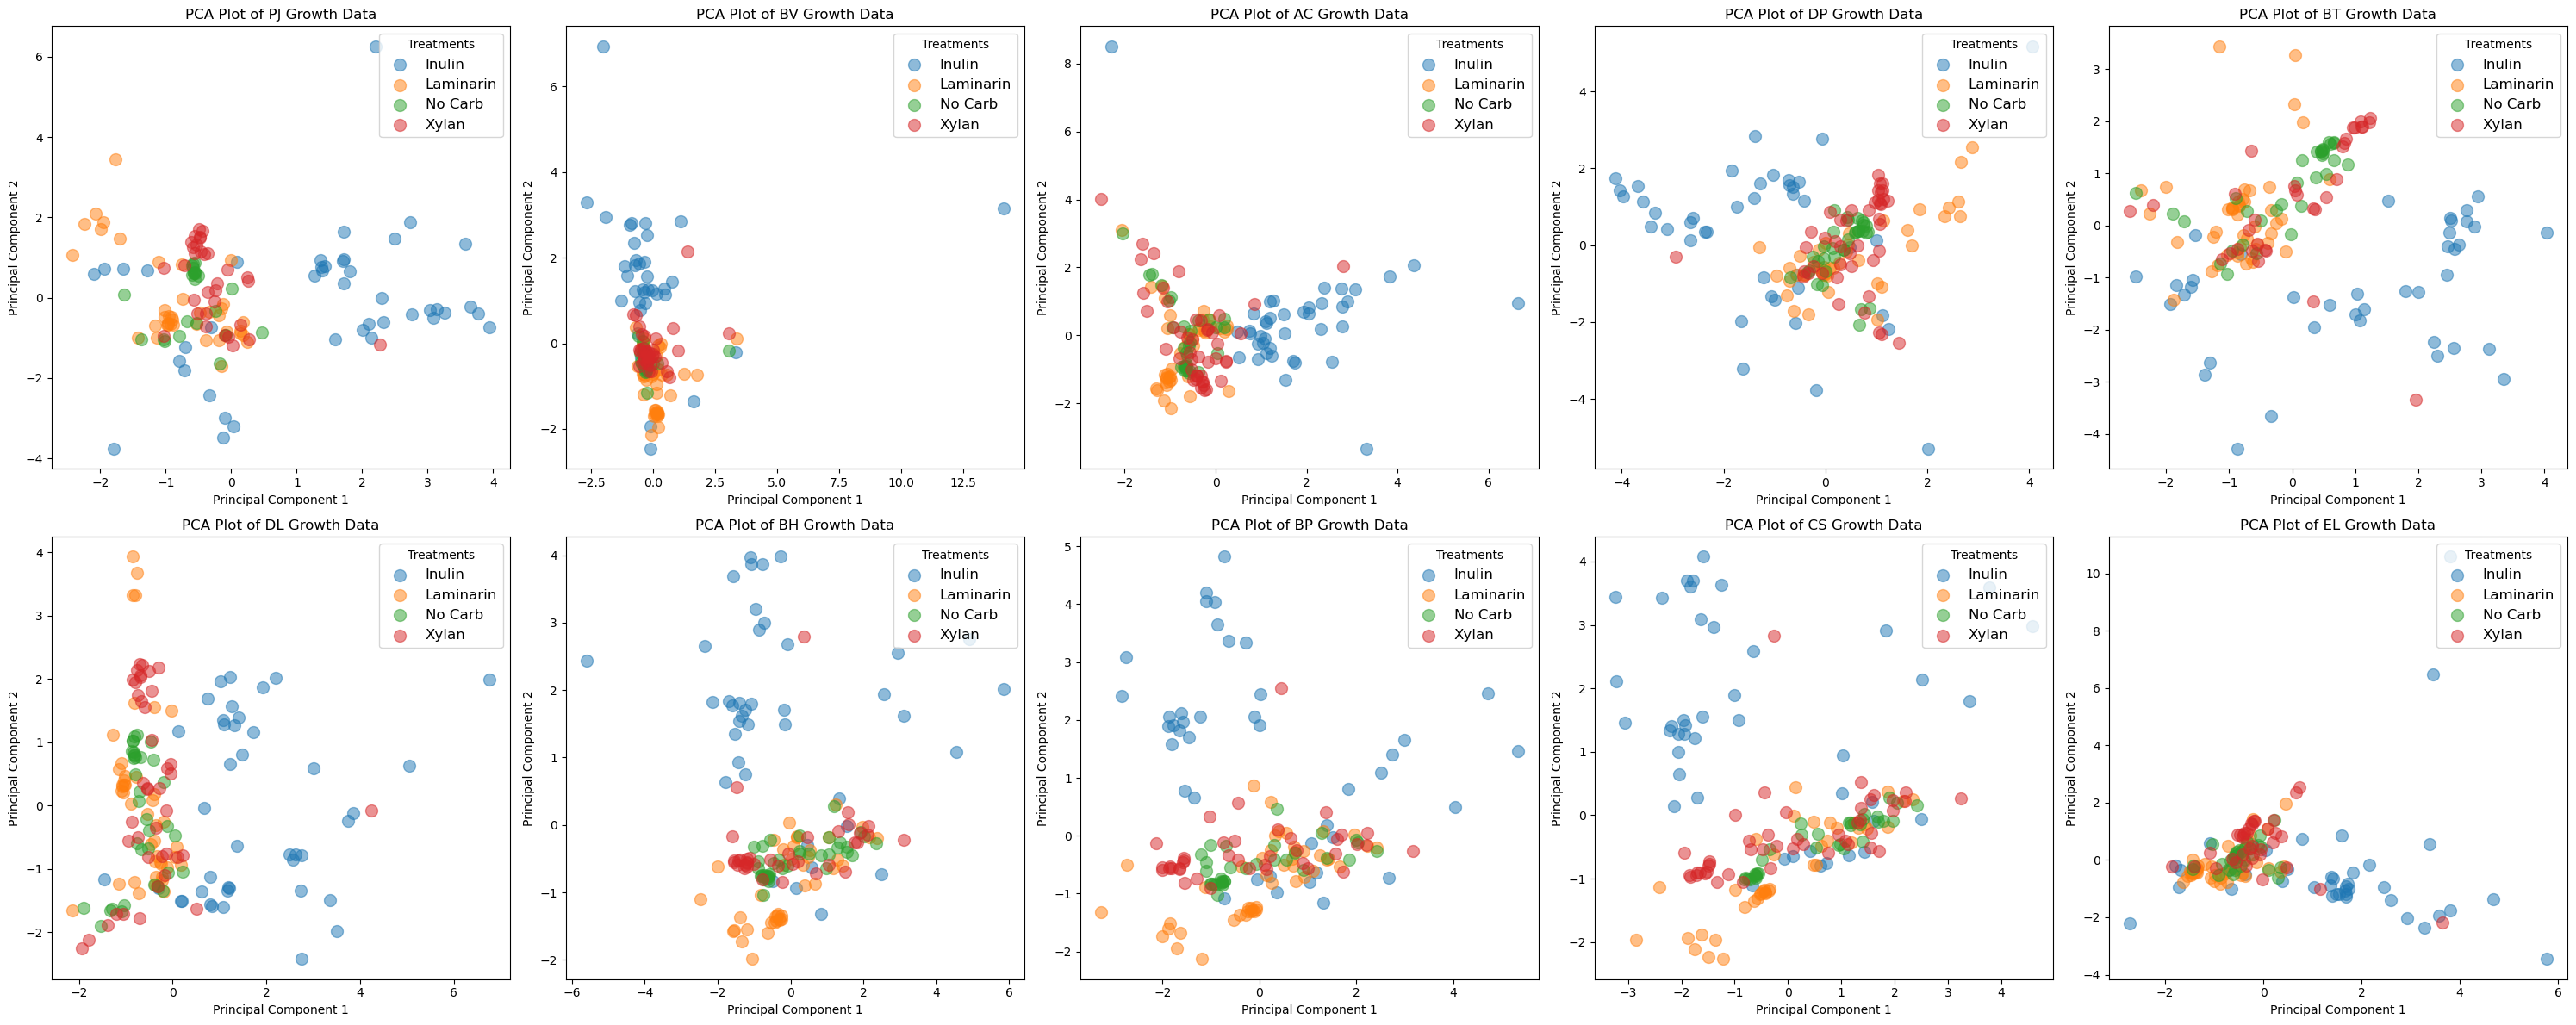

In [53]:

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))  
axs = axs.flatten()


for i in range(len(species)):
    sp = species[i]
    growth_data = load_growth_data(f'{sp}_growth_profile.csv')
    growth_data_norm = pd.DataFrame(scaler.fit_transform(growth_data.drop(columns=['Treatments'])), columns=growth_data.columns[:-1])
    pca = PCA(n_components=2)
    pca = pca.fit_transform(growth_data_norm)
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]
    pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
    pca_df['Treatments'] = growth_data['Treatments']


    n_components = np.arange(1,100)
    models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(growth_data_norm) for n in n_components]
    AICS = [m.aic(growth_data_norm) for m in models]
    aics = np.asarray([m.aic(growth_data_norm) for m in models])
    kmin = np.where(aics == np.amin(aics))[0][0]


    gmm = GaussianMixture(kmin+1, covariance_type='full')
    model = gmm.fit(growth_data_norm)
    model.predict(growth_data_norm)
    cluster = model.predict(growth_data_norm)
    score_gmm = silhouette_score(growth_data_norm, cluster)
    print(f'GMM with {kmin+1}: Silhouette Score = {score_gmm:.3f}')


    for j in np.unique(cluster):
        axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Cluster {j}', alpha=0.6, s=100)


    axs[i].set_title(f'GMM -  PCA Plot of {sp} Growth Data')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend(title='Treatments', loc='upper right', fontsize=12)
    
plt.tight_layout()
plt.show()


fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 12))  
axs = axs.flatten()
for i in range(len(species)):
    sp = species[i]
    growth_data = load_growth_data(f'{sp}_growth_profile.csv')
    growth_data_norm = pd.DataFrame(scaler.fit_transform(growth_data.drop(columns=['Treatments'])), columns=growth_data.columns[:-1])
    pca = PCA(n_components=2)
    pca = pca.fit_transform(growth_data_norm)
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]
    pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
    pca_df['Treatments'] = growth_data['Treatments']
    for t in np.unique(pca_df['Treatments']):
        axs[i].scatter(pca_df[pca_df['Treatments'] == t]['PC1'], pca_df[pca_df['Treatments'] == t]['PC2'], label=t, alpha=0.5, s=100)
    axs[i].set_title(f'PCA Plot of {sp} Growth Data')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')
    axs[i].legend(title='Treatments', loc='upper right', fontsize=12)
    
plt.tight_layout()
plt.show()